## Insurance Costs Dataset
This is a simple project demostration of how we can get very interesting insights about the data. With the propers techniques and visualizations we will be able to answer some valuable questions.
##### Although this is a good dataset samlpe for Machine Learning, this project its intended only for exploring, cleaning and visual purposes.

#### Contents of this dataset:

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

#### Techniques used:
#### For:
#### 1) Cleaning: 
Pandas Library
#### 2) Feature engineering: 
sklearn LabelEncoder()
#### 3) Visualizations: 
Seaborn & Pyplot (Heatmap, Histograms, Scatterplots, Barplots, Catplot, Lmplot)

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import LabelEncoder


In [330]:
df = pd.read_csv('C:/Users/faust/Desktop/Portfolio Projects/insurance.csv')
df.head(), df.tail()

(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
       age     sex    bmi  children smoker     region     charges
 1333   50    male  30.97         3     no  northwest  10600.5483
 1334   18  female  31.92         0     no  northeast   2205.9808
 1335   18  female  36.85         0     no  southeast   1629.8335
 1336   21  female  25.80         0     no  southwest   2007.9450
 1337   61  female  29.07         0    yes  northwest  29141.3603)

In [331]:
df.shape

(1338, 7)

### 1) Exploring the data:
#### a)  Size of the data, Data types & Column details
#### b) Duplicates
#### c) Outliers
#### d) Null values and Percentage of missing data
#### e) Correlation between values


#### a) Size of the data, Data types & Column details

In [332]:
# data types

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [333]:
# size of the data

df.shape

(1338, 7)

In [334]:
# columns details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### b) Check for duplocates

In [335]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(1, 7)

In [336]:
# Removing duplicates

print('Before: ', df.shape)
df = df.drop_duplicates()
print('After: ', df.shape)

Before:  (1338, 7)
After:  (1337, 7)


#### c) Outliers
We don't observe unusual parameters in general, all of the highest/lowest values are mostly probable to find. We will only do some cleaning in 'charges' feature.

In [337]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='charges'>

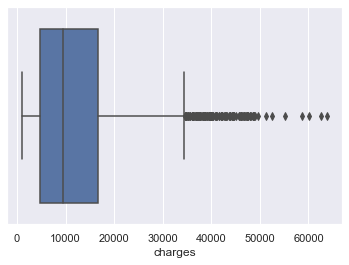

In [338]:
sns.boxplot(x=df['charges'])

#### Outliers detection using percentile:

In [339]:
min_threshold, max_threshold = df.charges.quantile([0.001, 0.999])
min_threshold, max_threshold

(1132.9964576, 61728.85778568055)

In [340]:
df[df.charges < min_threshold]

,age,sex,bmi,children,smoker,region,charges
808,18,male,30.14,0,no,southeast,1131.5066
940,18,male,23.21,0,no,southeast,1121.8739


In [341]:
df[df.charges > max_threshold]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801
1300,45,male,30.36,0,yes,southeast,62592.87309


#### d) Null values percentage

In [342]:
# Null values

df.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

#### e) Data Correlation using Heatmap:

<AxesSubplot:>

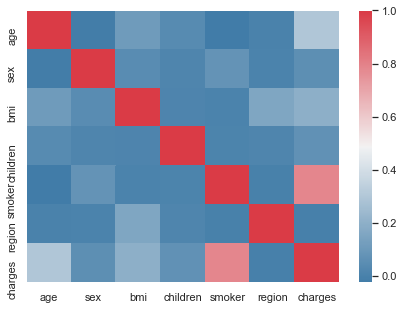

In [343]:
df_copy = df.copy()

# Data Correlation:

from sklearn.preprocessing import LabelEncoder

#sex
le = LabelEncoder()
le.fit(df_copy.sex.drop_duplicates()) 
df_copy.sex = le.transform(df_copy.sex)

# smoker or not
le.fit(df_copy.smoker.drop_duplicates()) 
df_copy.smoker = le.transform(df_copy.smoker)

#region
le.fit(df_copy.region.drop_duplicates()) 
df_copy.region = le.transform(df_copy.region)


plt.figure(figsize=(7, 5))  
sns.heatmap(df_copy.corr(), cmap=sns.diverging_palette(240, 10, n=9,as_cmap=True))

### 2) Cleaning the data
#### Tasks:


#### a) Feature engineering columns: Age

Age Column:

In [344]:
# We will add a new column 'Age Classification' for clear visualizations
df['age'].astype(int)
df['Age Classification'] = df['age']
df['Age Band'] = pd.cut(df['age'], 3)
df['Age Classification'].astype(int)
df.head()

,age,sex,bmi,children,smoker,region,charges,Age Classification,Age Band
0,19,female,27.900,0,yes,southwest,16884.92400,19,"(17.954, 33.333]"
1,18,male,33.770,1,no,southeast,1725.55230,18,"(17.954, 33.333]"
2,28,male,33.000,3,no,southeast,4449.46200,28,"(17.954, 33.333]"
3,33,male,22.705,0,no,northwest,21984.47061,33,"(17.954, 33.333]"
4,32,male,28.880,0,no,northwest,3866.85520,32,"(17.954, 33.333]"


In [345]:

# Normalizing Age Classification feature:
df.loc[df['Age Classification'] <= 31, 'Age Classification'] = 1
df.loc[ (df['Age Classification'] > 31) & (df['Age Classification'] <= 45), 'Age Classification'] = 2
df.loc[ df['Age Classification'] > 45, 'Age Classification'] = 3

# Mapping the ranges
age_mapping = {1: 'YoungAdult', 2: 'Middle-agedAdult', 3: 'OldAdult'}  
df['Age Classification'] = df['Age Classification'].map(age_mapping)
df['Age Classification'] = df['Age Classification'].fillna(0)

# Dropping Age Band column
df = df.drop(['Age Band'], axis=1)

In [346]:
df

,age,sex,bmi,children,smoker,region,charges,Age Classification
0,19,female,27.900,0,yes,southwest,16884.92400,YoungAdult
1,18,male,33.770,1,no,southeast,1725.55230,YoungAdult
2,28,male,33.000,3,no,southeast,4449.46200,YoungAdult
3,33,male,22.705,0,no,northwest,21984.47061,Middle-agedAdult
4,32,male,28.880,0,no,northwest,3866.85520,Middle-agedAdult
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,OldAdult
1334,18,female,31.920,0,no,northeast,2205.98080,YoungAdult
1335,18,female,36.850,0,no,southeast,1629.83350,YoungAdult
1336,21,female,25.800,0,no,southwest,2007.94500,YoungAdult


#### b) Renaming columns: charges to -> Insurances Expenses, children to -> N° of Children, sex to -> Sex, smoker to -> Smoker and bmi to -> BMI

In [347]:
df = df.rename({'charges':'Insurance Expenses', 'sex':'Sex', 'bmi':'BMI', 'smoker':'Smoker',
               'children':'N° of Children'}, axis='columns')
df.head()

,age,Sex,BMI,N° of Children,Smoker,region,Insurance Expenses,Age Classification
0,19,female,27.900,0,yes,southwest,16884.92400,YoungAdult
1,18,male,33.770,1,no,southeast,1725.55230,YoungAdult
2,28,male,33.000,3,no,southeast,4449.46200,YoungAdult
3,33,male,22.705,0,no,northwest,21984.47061,Middle-agedAdult
4,32,male,28.880,0,no,northwest,3866.85520,Middle-agedAdult


#### c) Remove 'region' column, as it doesn't have any correlation between the other features

In [348]:
df = df.drop(['region'], axis=1)
df.head()

,age,Sex,BMI,N° of Children,Smoker,Insurance Expenses,Age Classification
0,19,female,27.900,0,yes,16884.92400,YoungAdult
1,18,male,33.770,1,no,1725.55230,YoungAdult
2,28,male,33.000,3,no,4449.46200,YoungAdult
3,33,male,22.705,0,no,21984.47061,Middle-agedAdult
4,32,male,28.880,0,no,3866.85520,Middle-agedAdult


### 3)Data Visualization
In the previous heatmap we saw a strong correlation with people who smoke and their insurance expenses. Because of that we will answer the following questions taking the feature 'Smoker' along with 'Insurance Expenses' as a pivot with the rest of features in the data.

#### Smokers & Insurance Expenses

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

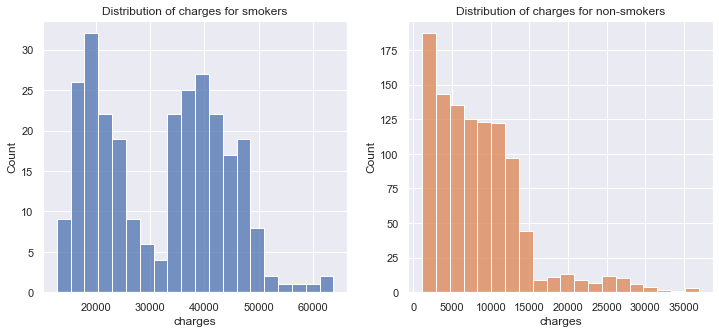

In [349]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(df_copy[(df_copy.smoker == 1)]["charges"],color='C0',ax=ax,bins=20)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(df_copy[(df_copy.smoker == 0)]['charges'],color='C1',ax=ax,bins=20)
ax.set_title('Distribution of charges for non-smokers')

### Questions to aswer:
#### a) Does the Age have an influence in the charges of Insurance Expenses?
#### b) Are young smoker adults getting charge as high as old smoker adults?
#### c) Does the N° of Children have an impact in the Insurance Expenses?
#### d) Do Males are getting charged more than Females or viceversa?
#### e) Beside smoker people, are BMI a critical factor in Insurance Expenses?

### Smoker & Insurance Expenses with Age
As follow we observe how Insurance Cost increase while aging, which is in some way logic. We also see how young adult smokers are paying as hihg as the oldest one.

<AxesSubplot:xlabel='age', ylabel='Insurance Expenses'>

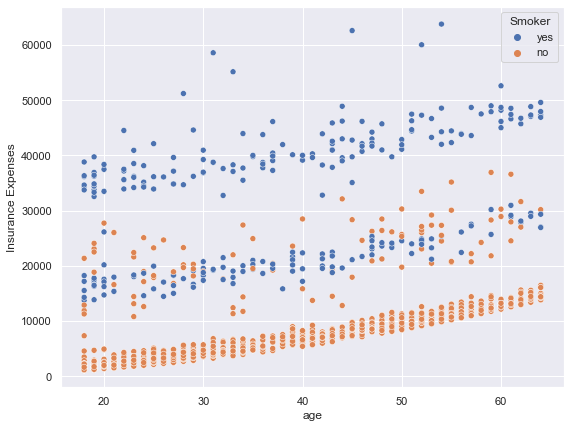

In [350]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x="age", y="Insurance Expenses", hue='Smoker')

<AxesSubplot:xlabel='Age Classification', ylabel='Insurance Expenses'>

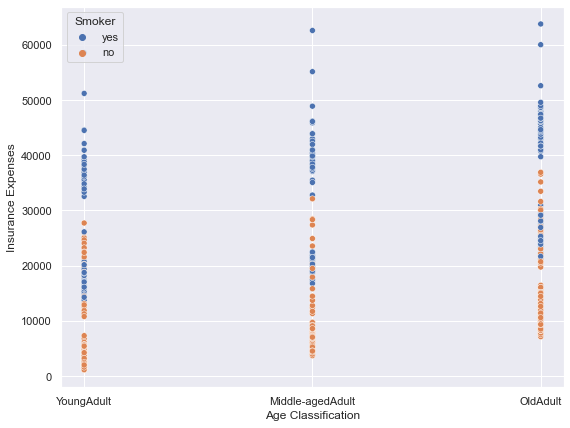

In [351]:
# Smoker & Insurance Expenses with Age Classification
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x="Age Classification", y="Insurance Expenses", hue='Smoker')

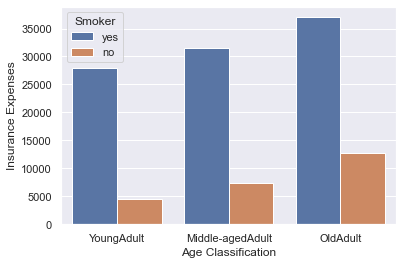

In [355]:
ax = sns.barplot(y="Insurance Expenses", x="Age Classification", data=df, hue='Smoker', ci=None)


### Smoker & Insurance Expenses with N° of Childrens
There's no evidence that the N° of Children in each individual are affecting the insurance cost in general, except for those individuals who actually smoke, once again. It seems also that some people with 1, 2 or 4 children in this dataset could have had some kind of missfortune as we can se in the chart below their expenses rise up among people that don't smoke with 5 children.

<AxesSubplot:xlabel='N° of Children', ylabel='Insurance Expenses'>

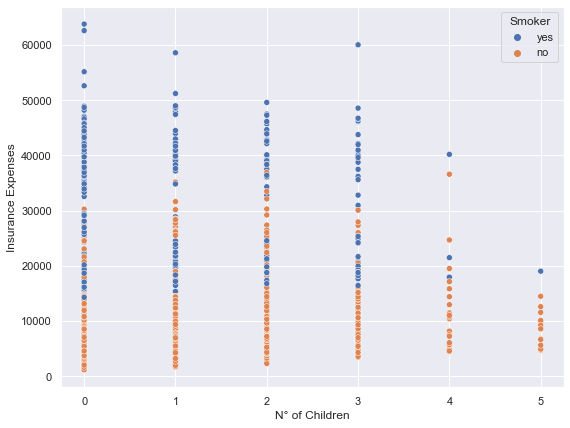

In [357]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x="N° of Children", y="Insurance Expenses", hue='Smoker')

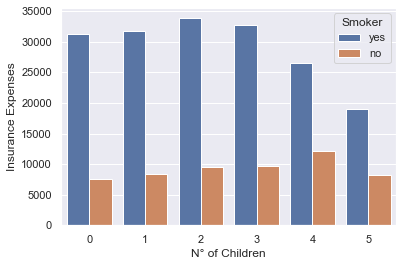

In [358]:
ax = sns.barplot(y="Insurance Expenses", x="N° of Children", data=df, hue='Smoker', ci=None)

#### Percentage of Smoker by N° of Childrens

In [359]:
df_copy[['children', 'smoker']].groupby(['children'],
                                        as_index=False).mean().sort_values(by='smoker', ascending=False).reset_index(drop=True)

,children,smoker
0,3,0.248408
1,2,0.229167
2,0,0.200698
3,1,0.188272
4,4,0.120000
5,5,0.055556


### Smoker & Insurance Expenses with Sex
There is a greter percentage of smoker males in this dataset. Overall both men an women are charged almost the same, including those who do not smoke.

In [360]:
df_copy[['sex', 'smoker']].groupby(['sex'],
                                        as_index=False).mean().sort_values(by='smoker', ascending=False).reset_index(drop=True)

,sex,smoker
0,1,0.235556
1,0,0.173716


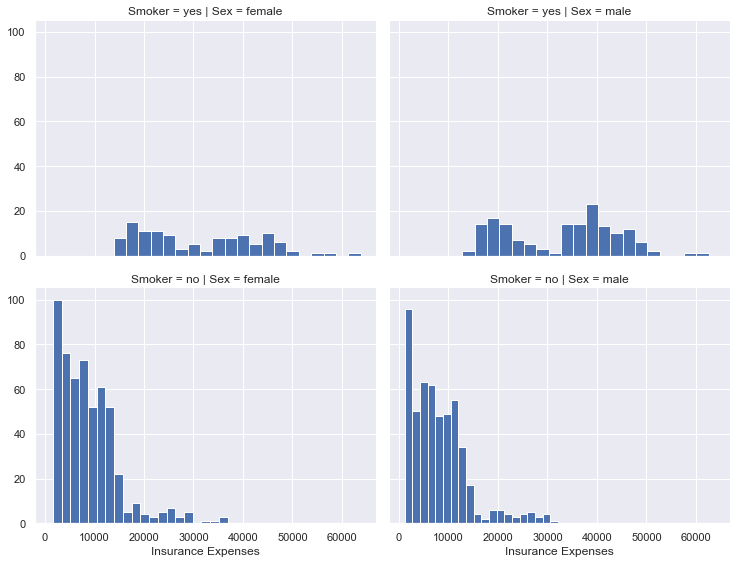

In [362]:
g = sns.FacetGrid(df, col='Sex', row='Smoker', height=4, aspect=1.3)
g.map(plt.hist, 'Insurance Expenses', bins=20)

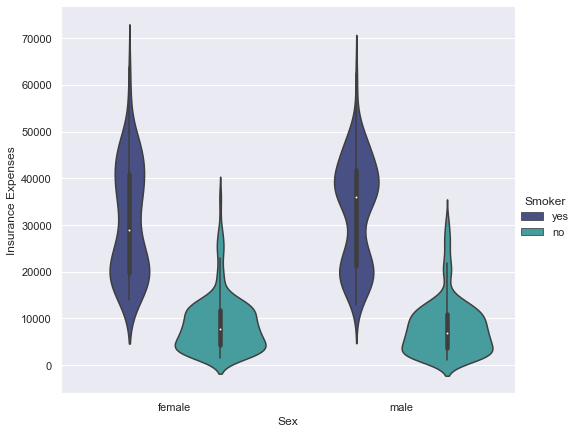

In [363]:
sns.catplot(x="Sex", y="Insurance Expenses", hue="Smoker",
            height=6, aspect=1.2,
            kind="violin", data=df, palette = 'mako')

### BMI with Insurance Expenses
It's really impressive to look at this BMI distribution, and how being a smoker still a big factor in insurance costs.

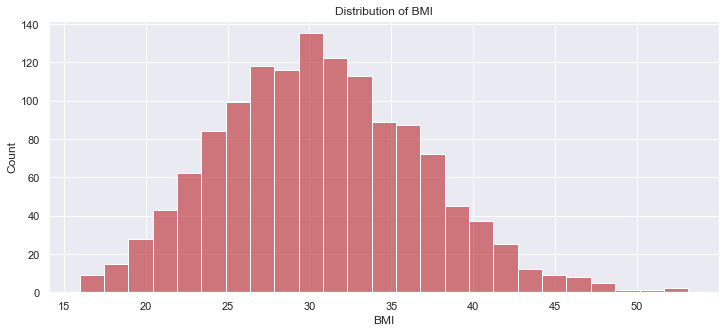

In [364]:
plt.figure(figsize=(12,5))
plt.title("Distribution of BMI")
ax = sns.histplot(df["BMI"], color = 'C3')

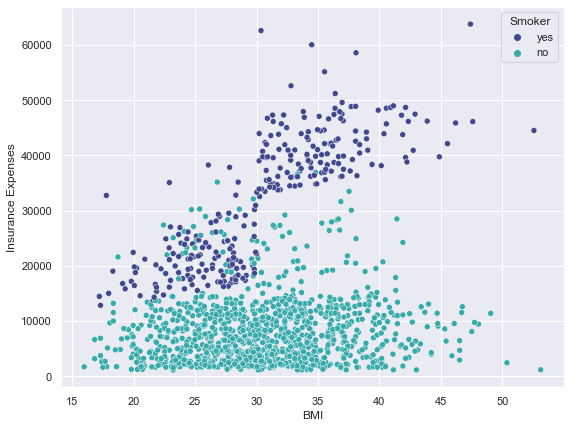

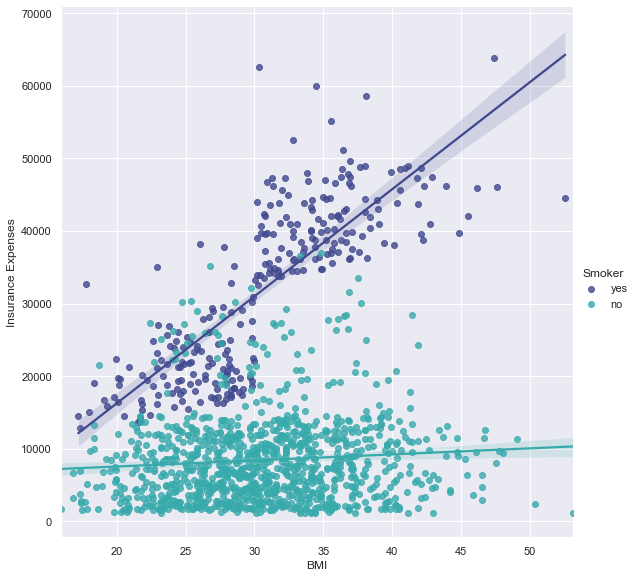

In [371]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x="BMI", y="Insurance Expenses", hue='Smoker', palette='mako')

sns.lmplot(data=df, x="BMI", y="Insurance Expenses", hue='Smoker', palette='mako', height=8)

## Conclusion

##### 1) Smoking is a critical factor in insurance cost, no matter the age. Young adults smokers have almost same charges as middle aged adults and old adults.
##### 2) Aging also rise up slightly the insurance cost.
##### 3) Having more children has a tiny increase in insurance but not that much.
##### 4) Men and women are almost equally charged in every condition.
##### 5) BMI has almost 0 correlation with the increase of insurance charges except for those who smoke and are also obese which had the highers numbers in insurance cost.